<a href="https://colab.research.google.com/github/Daffaaq/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Daffa Aqila Rahmatullah

Nim: 2041720098

Kelas: TI-3G

# Object Detection



1.   Template Matching
2.   Edge Detection
3.   Corner Detection
4.   Grid Detection
5.   Contour Detection



In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Template Matching

Menggunakan library openCV

cv.match.Template(), dengan parameter.


*   Image: citra input
*   templ: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
*   method: metode dari template matching

jenis metode template matching di openCV:


1.   TM_SQDIFF
2.   TM_SQDIFF_NORMED
3.   TM_CCORR
4.   TM_CCORR_NORMED
5.   TM_CCOEFF
6.   TM_CCOEFF_NORMED

(<matplotlib.image.AxesImage at 0x7f2bbcaedde0>,
 Text(0.5, 1.0, 'template imaga'))

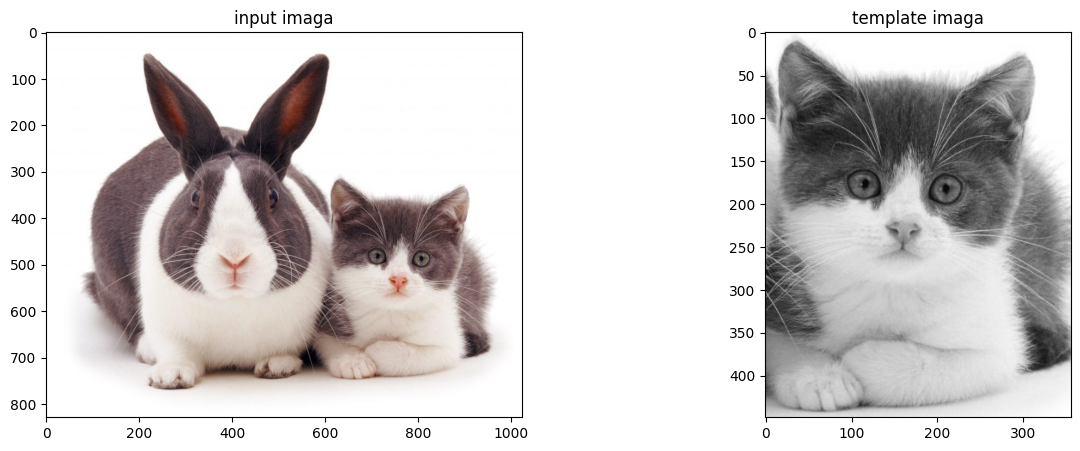

In [3]:
#pre processing

# load citra input

img_input = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img_input,cv.COLOR_BGR2GRAY)
img_copy = img_input.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/cat2_templatejpg.jpg',0)

#width dan height
w,h = template.shape[::-1]

#print
f, axarr = plt.subplots(1,2, figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB)), axarr[0].set_title("input imaga")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template imaga")

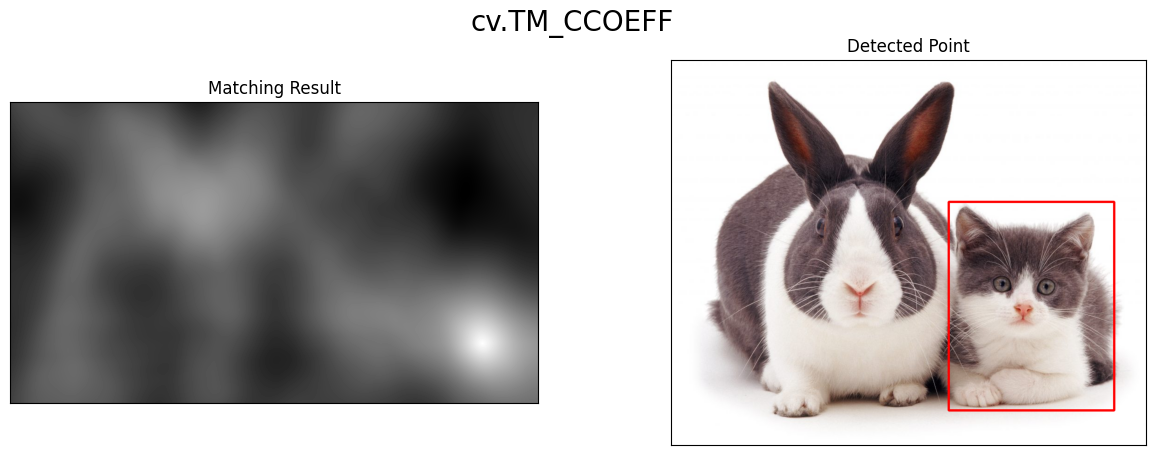

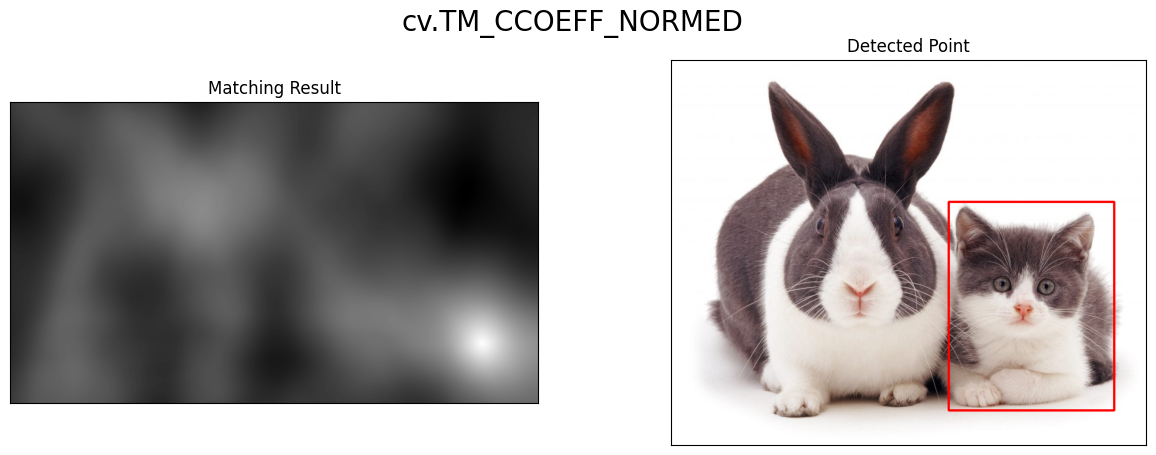

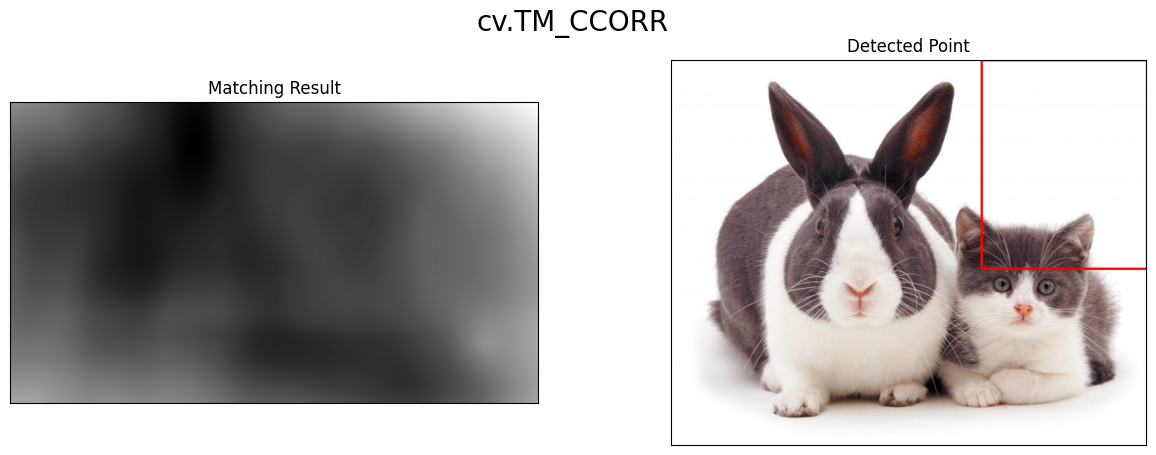

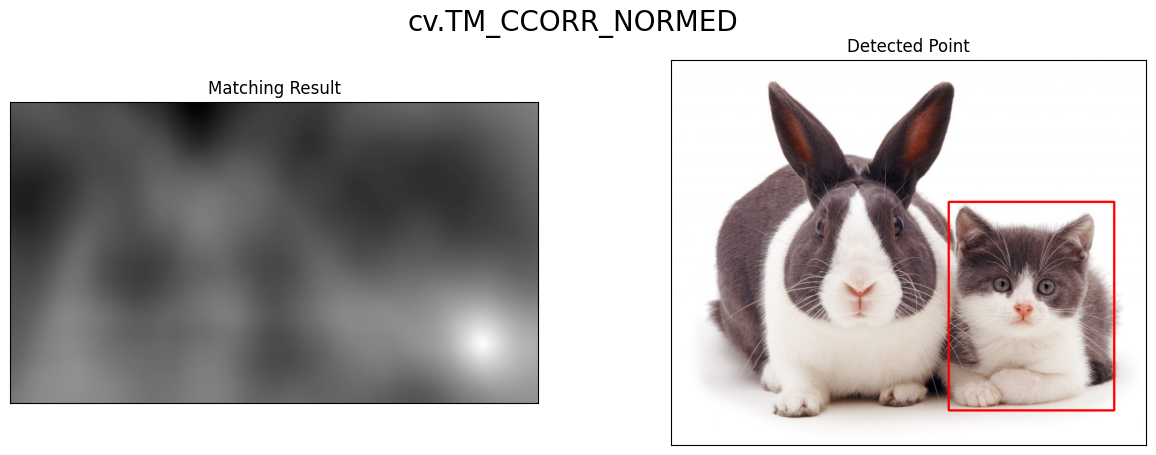

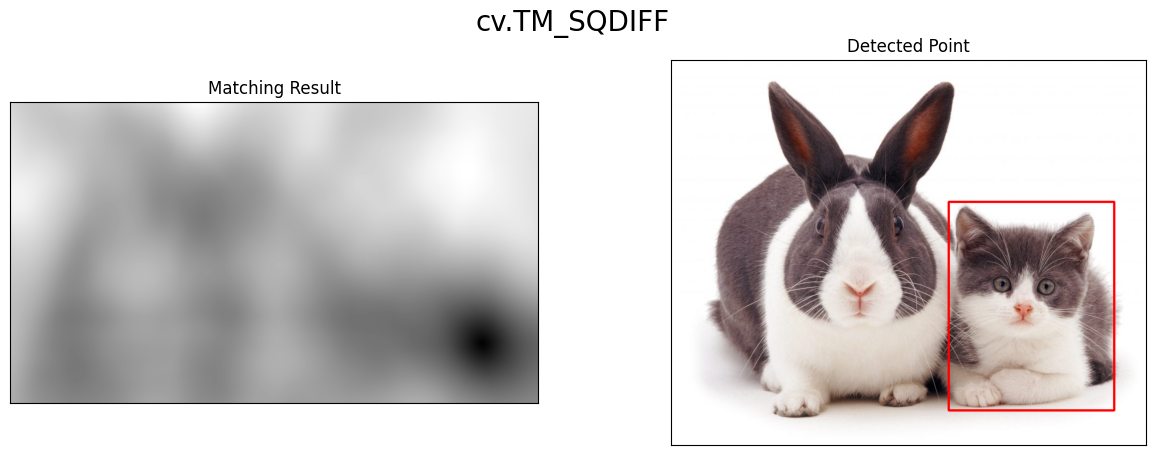

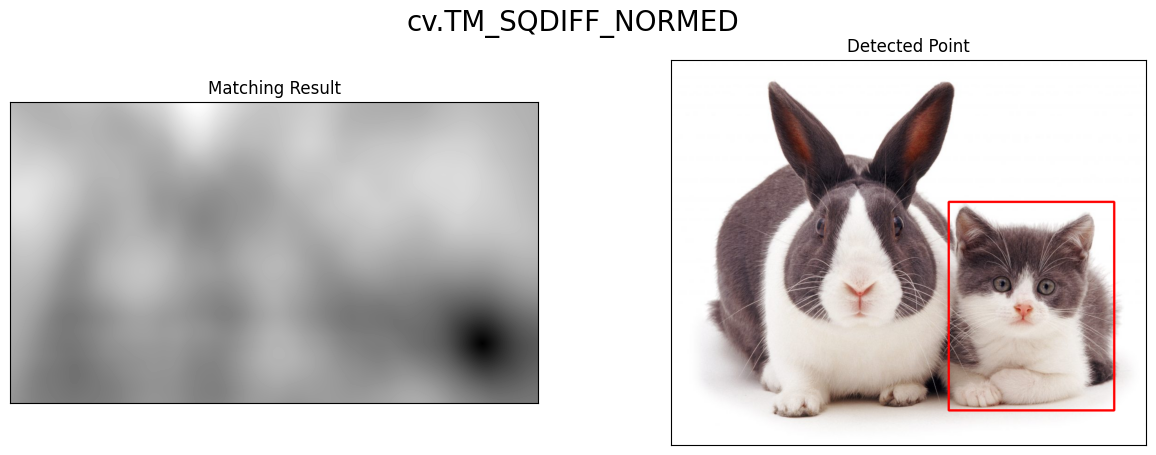

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load input image and template
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/cats_and_bunnies.jpg')
template = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/cat2_templatejpg.jpg', 0)

# Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Get template width and height
w, h = template.shape[::-1]

# Define template matching methods to be used
methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

# Loop over each method
for meth in methods:
    # Create copy of input image
    img_copy = img.copy()

    # Get template matching method
    method = eval(meth)

    # Apply template matching
    res = cv.matchTemplate(img_gray, template, method)

    # Get top-left corner of the best match
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Get bottom-right corner of the best match
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around the best match
    cv.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 3)

    # Plot the results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.imshow(res, cmap='gray')
    ax1.set_title('Matching Result')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(cv.cvtColor(img_copy, cv.COLOR_BGR2RGB))
    ax2.set_title('Detected Point')
    ax2.set_xticks([])
    ax2.set_yticks([])
    fig.suptitle(meth, fontsize=20)
    plt.show()


### tanpa library

(<matplotlib.image.AxesImage at 0x7f2b98129fc0>,
 Text(0.5, 1.0, 'template image'))

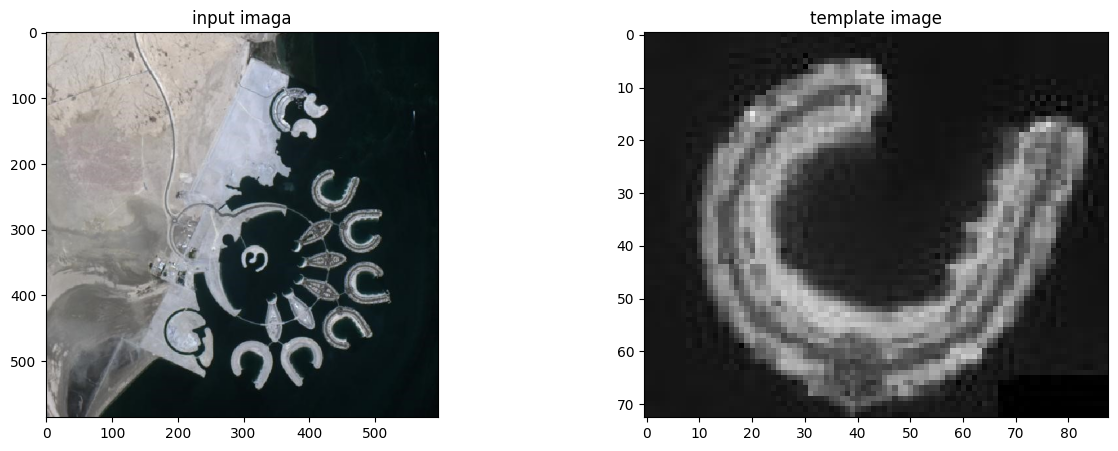

In [5]:
# pre processing

# load citra input

img_input = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/bahrain.jpg')
img_gray = cv.cvtColor(img_input,cv.COLOR_BGR2GRAY)
img_copy = img_input.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/bahrain-template.jpg',0)

#width dan height
w,h = template.shape[::-1]

#print
f, axarr = plt.subplots(1,2, figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img_input, cv.COLOR_BGR2RGB)), axarr[0].set_title("input imaga")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

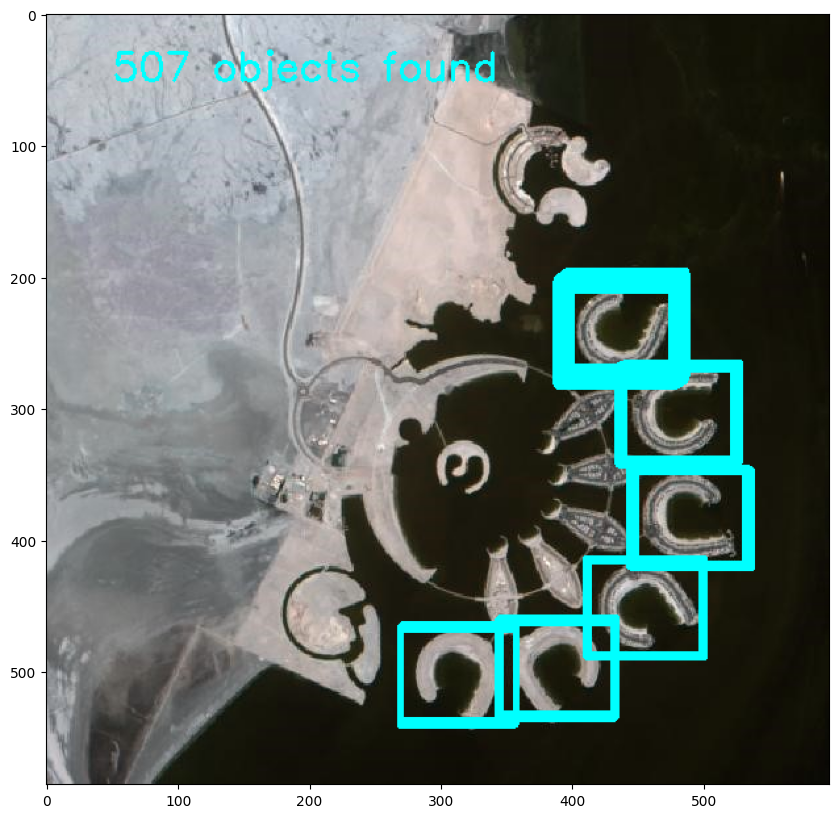

In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image source
img_src = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/bahrain.jpg')

# Load template image
template = cv2.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/bahrain-template.jpg')

# Get template size
h, w = template.shape[:2]


# Define threshold
threshold = 0.41

# Perform template matching
result = cv2.matchTemplate(img_src, template, cv2.TM_CCOEFF_NORMED)

# Get locations of matched objects
locations = np.where(result >= threshold)

# Draw rectangles around matched objects
counter = 0
for loc in zip(*locations[::-1]):
    cv2.rectangle(img_src, loc, (loc[0]+w, loc[1]+h), (0, 255, 255), 1)
    counter += 1

# Add text to the image with the number of matched objects
cv2.putText(img_src, f"{counter} objects found", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

# Display result image
plt.figure(figsize=(20,10)) 
plt.imshow(img_src)
# cv.imshow('Result', img_src)

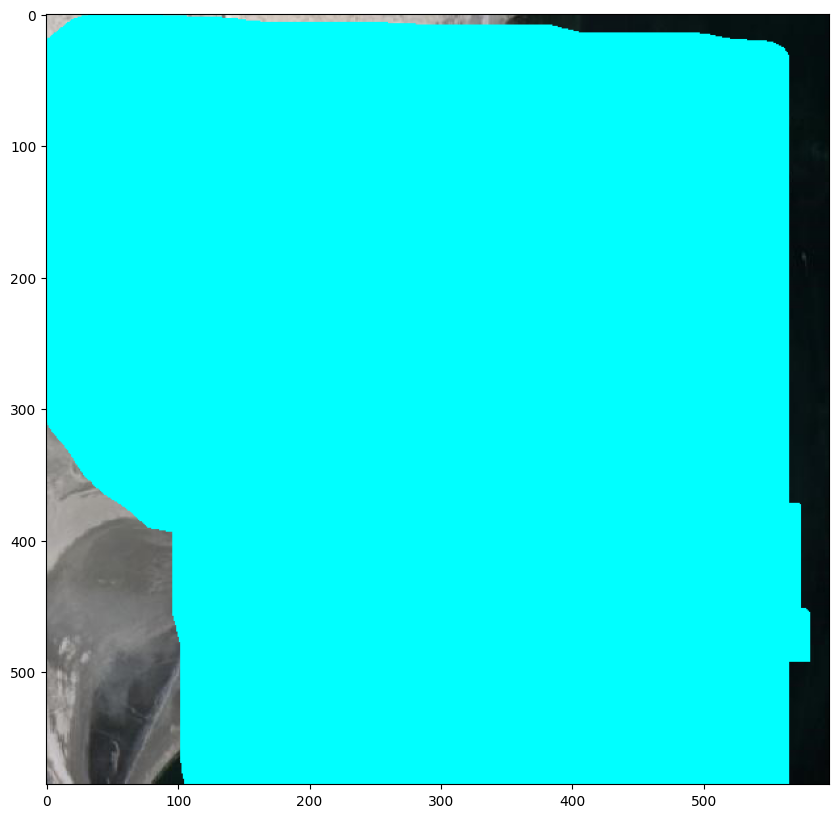

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import io, color
from skimage.filters import threshold_otsu

# Load image source
img_src = io.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/bahrain.jpg')

# Load template image
template = io.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/bahrain-template.jpg')

# Convert to grayscale
img_gray = color.rgb2gray(img_src)
template_gray = color.rgb2gray(template)

# Get template size
h, w = template_gray.shape[:2]

# Define threshold
threshold = 0.41

# Perform template matching
corr = convolve2d(img_gray, template_gray[::-1, ::-1], mode='same')
result = (corr > threshold * corr.max()) * 1

# Get locations of matched objects
locations = np.where(result == 1)

# Draw rectangles around matched objects
for loc in zip(*locations):
    cv2.rectangle(img_src, loc, (loc[1]+w, loc[0]+h), (0, 255, 255), 1)

# Display result image
plt.figure(figsize=(20,10)) 
plt.imshow(img_src)


### Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV

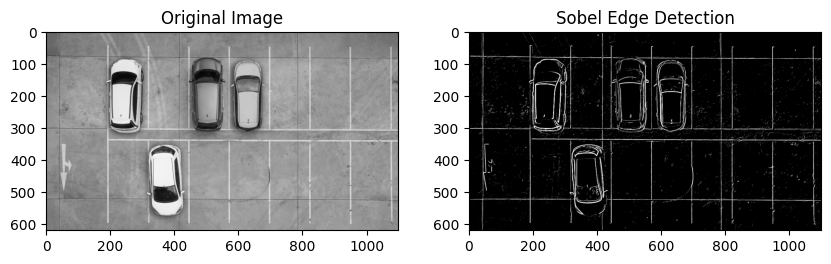

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Sobel filter kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Filter image using filter2D
filtered_image_x = cv.filter2D(image_original, -1, sobel_kernel_x)
filtered_image_y = cv.filter2D(image_original, -1, sobel_kernel_y)

# Combine X and Y Sobel edge detection
sobel_edge_detection = cv.bitwise_or(filtered_image_x, filtered_image_y)

# Thresholding
threshold_value = 50
sobel_edge_detection[sobel_edge_detection < threshold_value] = 0

# Display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image_original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(sobel_edge_detection, cmap='gray')
ax[1].set_title('Sobel Edge Detection')
plt.show()


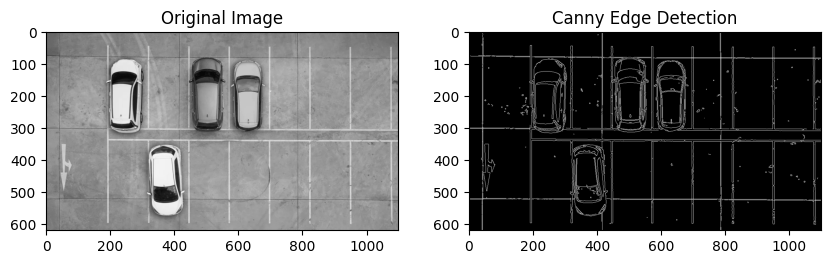

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv.Canny(image_original, 100, 200)

# Display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(image_original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny Edge Detection')
plt.show()


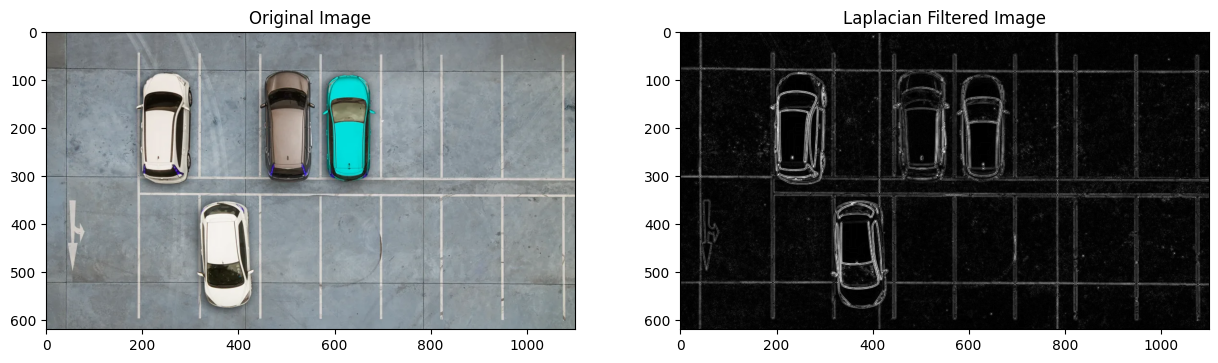

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image_original = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/car-park.jpg')

# remove noise
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)
# Reduce noise in image
img = cv.GaussianBlur(image_gray,(3,3),0)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)
# converting back to uint8
filtered_image = cv.convertScaleAbs(filtered_image)
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

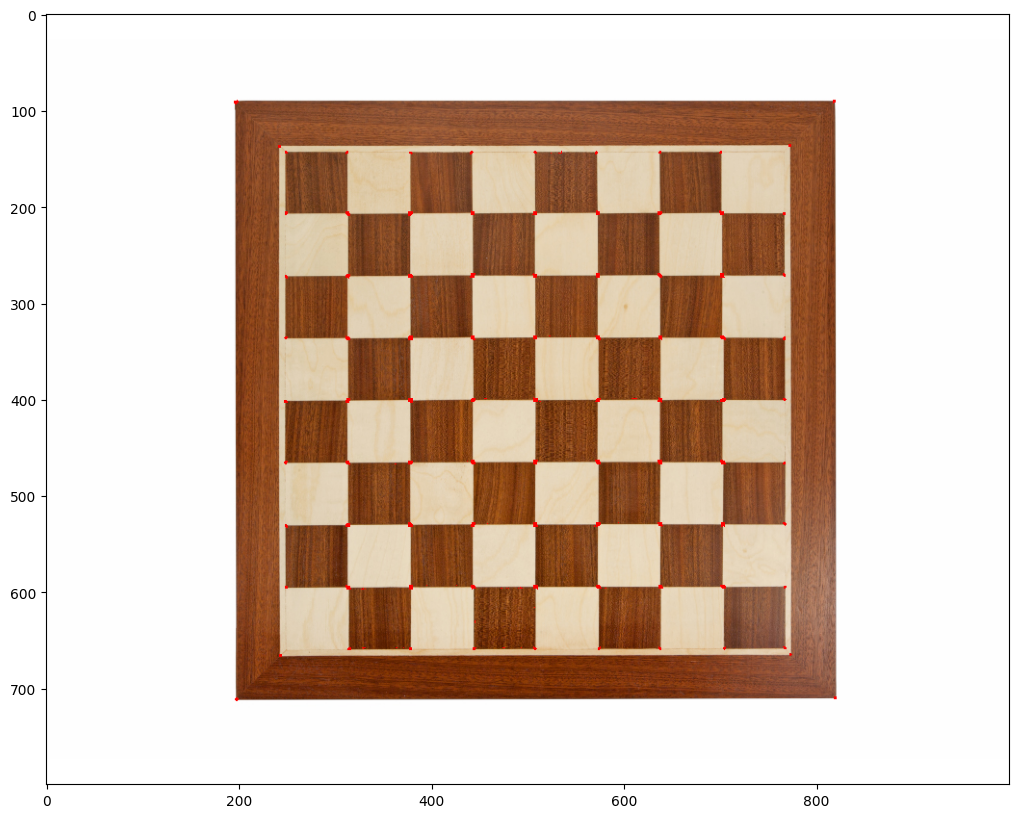

In [ ]:
#load citra input 
input_img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

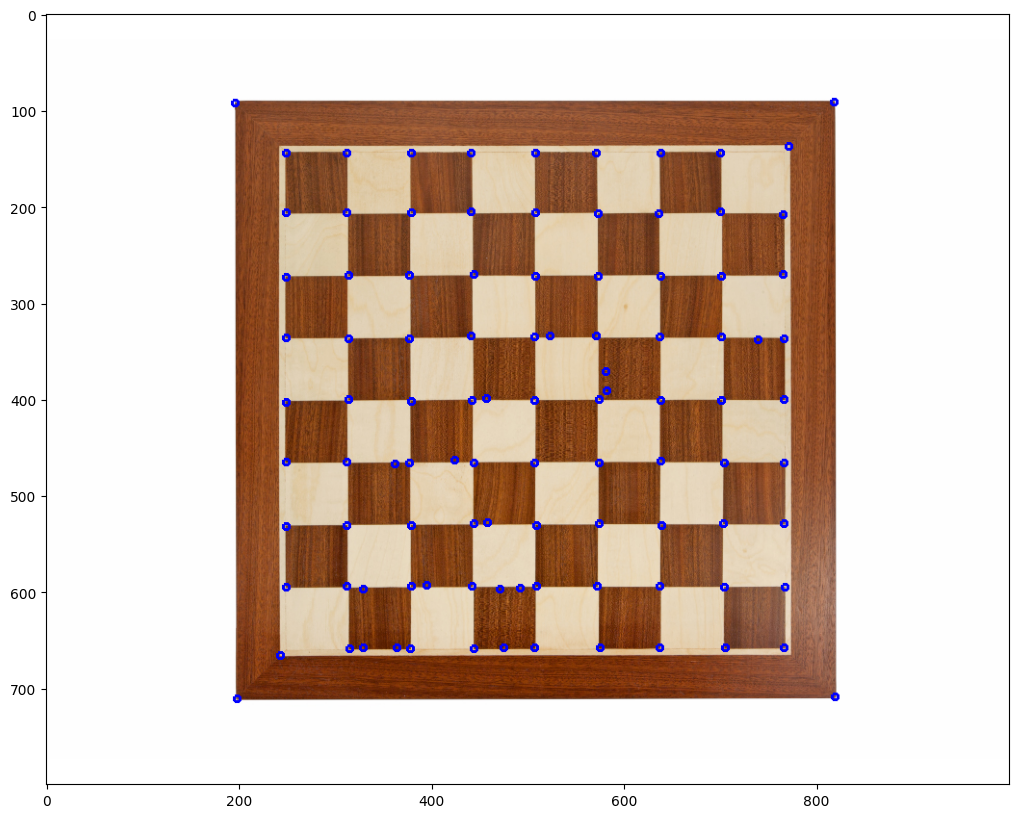

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

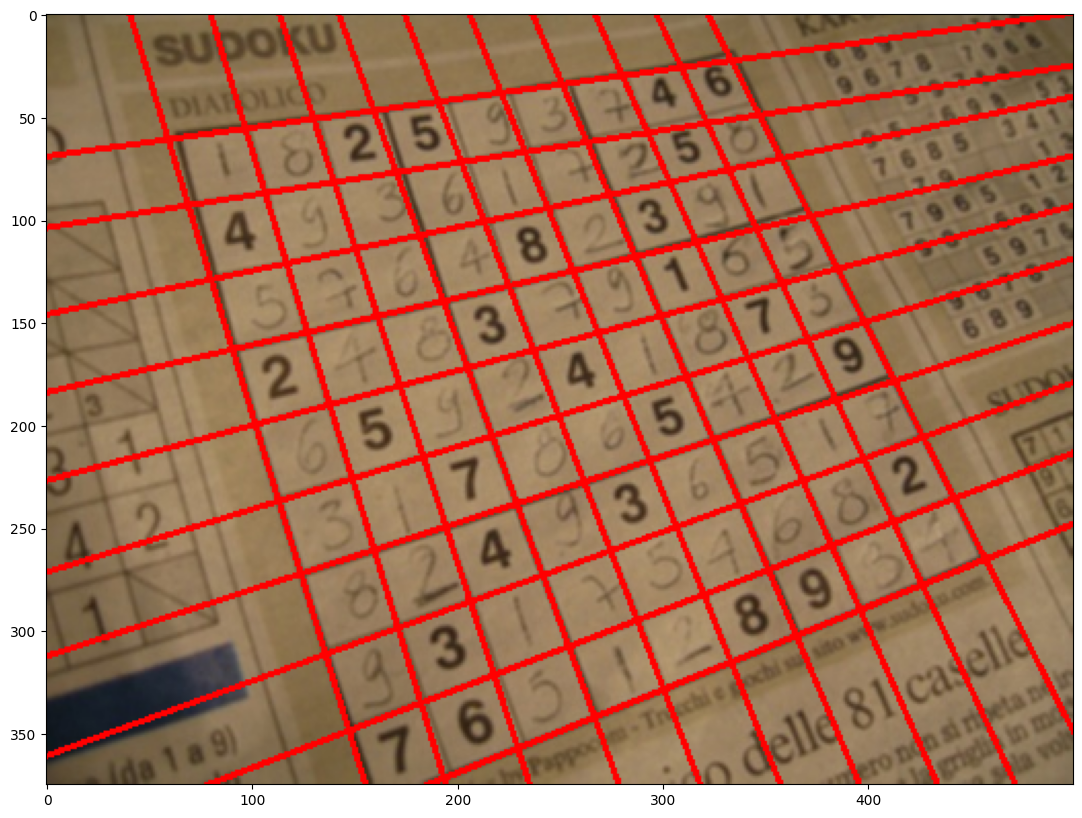

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

input_img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/sudoku.jpg') 
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue



        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)
        
plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))


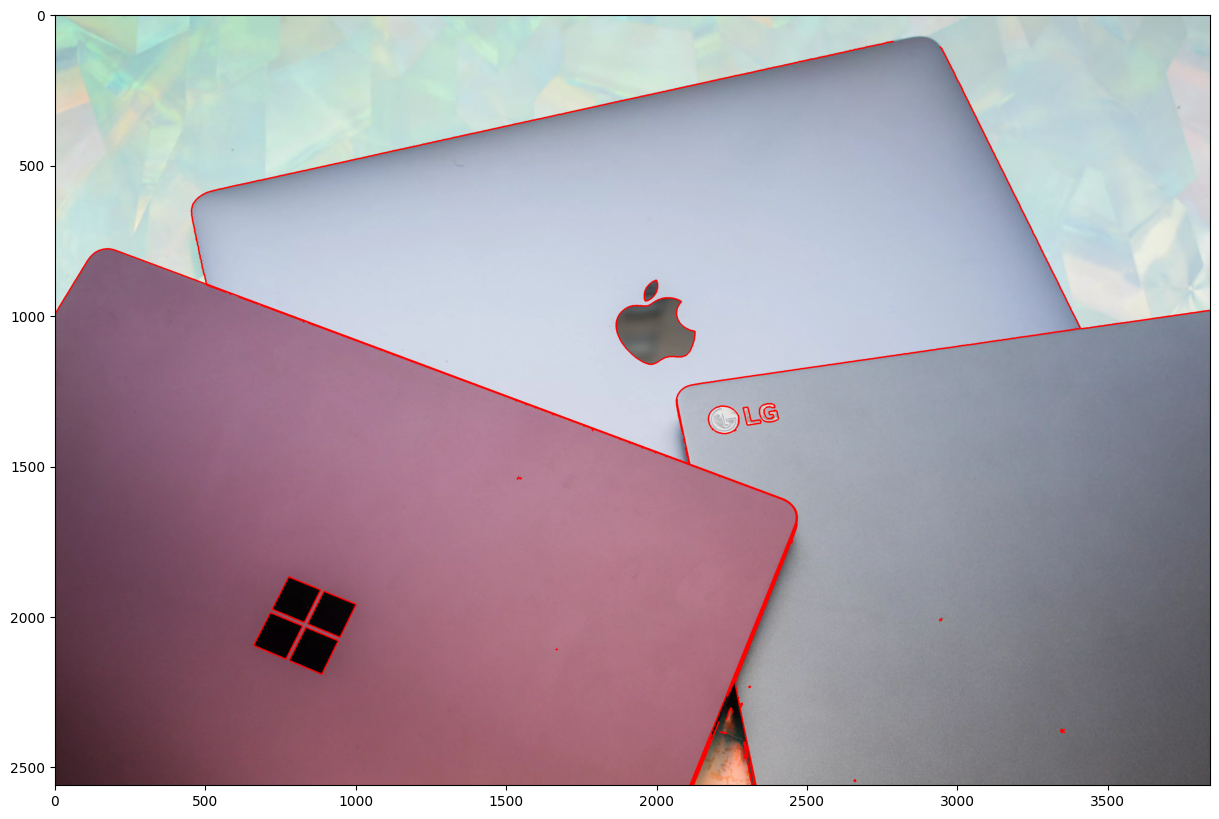

In [ ]:
img = cv.imread('/content/drive/MyDrive/PVCK/Pertemuan 3/Images/Object Detection/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))